### 1. For the dataset given in HW2, create a heatmap with all the features - 1 point

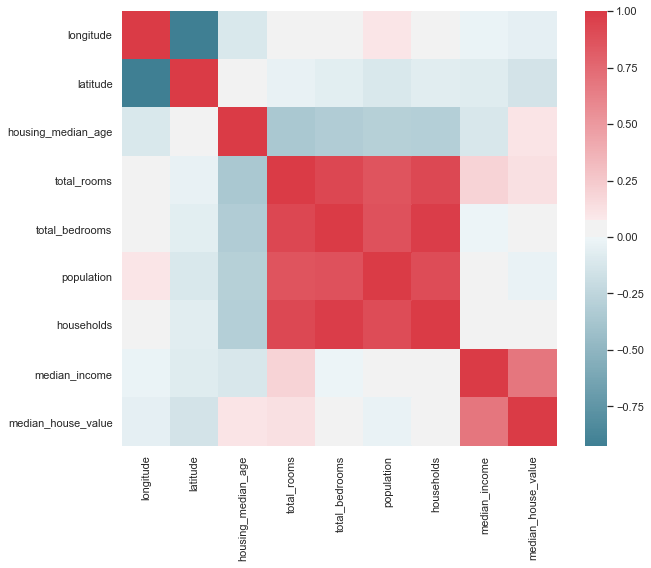

In [41]:
# Import needed libraries to get data from URL and load into Pandas DF
import os
import tarfile
import urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

DATA_URL = "https://raw.githubusercontent.com/JacobBRodriguez/SJSU/master/Fall%202020/DataSets/datasetHW2.csv"
DATA_PATH = os.path.join("/Users/Do-While/Desktop/SJSU/Classes/SJSU/Fall 2020", "DataSets")

# Function to get data from URL and return it as Pandas dataframe - from HW2
def fetch_and_load_from_url(data_url, data_path):
    
    # If no data path exists, create directory
    if not os.path.isdir(DATA_PATH):
        os.makedirs(DATA_PATH)
    # create text document path under OS path
    txt_path = os.path.join(DATA_PATH, "hw2_data.txt")
    # Using URL, request data and return to created path
    urllib.request.urlretrieve(DATA_URL, txt_path)
    # Read in text file, convert csv to pandas df and return upon close of file
    with open(txt_path, "r") as file:
        return pd.read_csv(file, header=0)
    
hwDataSet = fetch_and_load_from_url(DATA_URL, DATA_PATH)

# Index DF from row 1 onward and save as new DF

# Inferring object types for data analysis
work_df = hwDataSet.infer_objects()

# Getting rid of rows with NaN
work_df.dropna(inplace=True)

# Creating dummy variables for dataframe for categorical column
#work_df = pd.get_dummies(work_df, columns=["ocean_proximity"])

work_df.drop(columns="ocean_proximity", inplace=True)

# Creating figure and axis
fig, ax = plt.subplots(figsize=(10,8))

# Making heatmap with correlation information from dataframe with work_df.corr()
sns.heatmap(work_df.corr(), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)

### 2. Apply feature selection on top 5, top 7, top 9 and all features and repeat the steps from 2 to 5 - 1 point each

In [42]:
# Selecting top 5 features

# Applying MinMaxScaling so that can use chi2 for all positive values
from sklearn.preprocessing import MinMaxScaler

# Creating scaler object
min_max_scaler = MinMaxScaler()
# Fitting and transforming training set data to scale
min_max_train = min_max_scaler.fit_transform(work_df)

# Recreating DF with original names with newly scaled data
saved_names = work_df.columns
min_max_train_df = pd.DataFrame(min_max_train, columns=saved_names)
min_max_train_df
# Splitting training data into features (X) and target (Y)
X = min_max_train_df.loc[:, min_max_train_df.columns != "median_house_value"]
Y = min_max_train_df.iloc[:, 8]
Y = Y.astype(int)


# Applying chi2 feature selection to get 5 features

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
# Fitting features to score function to get top 5
fit = bestfeatures.fit(X,Y)

# Getting the fit scores of the columns
dfscores = pd.DataFrame(fit.scores_)
# Getting column names to better understand which columns are named
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score'))  #print 5 best features

                Specs       Score
7       median_income  321.195365
2  housing_median_age   19.168571
1            latitude    5.794341
5          population    1.927582
3         total_rooms    1.028263


### 3. Apply linear regression on training set and evaluate your model on the test set by RMSE  - 1 point each

In [43]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Function to create a mask of true or false for values that are less than .7 (our 70 % mark)
def create_training_test(incoming_df):
    mask = np.random.rand(len(incoming_df)) < 0.7

    training_set = incoming_df[mask]
    test_set = incoming_df[~mask]
    return training_set, test_set  
    
# Split the data into training/testing sets
training_data, test_data = create_training_test(work_df)

# Getting selected features (5) from training/test data set
training_features = training_data[featureScores.nlargest(5,'Score')["Specs"]]
testing_features = test_data[featureScores.nlargest(5,'Score')["Specs"]]

# Getting selected target from training/test data
training_target = training_data.iloc[:, 8]  
testing_target = test_data.iloc[:, 8]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(training_features, training_target)

# Make predictions using the testing set
target_predict = regr.predict(testing_features)

print('Mean squared error: %.2f'
      % sqrt(mean_squared_error(testing_target, target_predict)))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(testing_target, target_predict))

Mean squared error: 79920.77
Coefficient of determination: 0.52


### Repeat the steps 2 and 3 for top 7, top 9 and all features : Total 4X2 points

### Repeating for top 7 features

In [44]:
# Selecting top 7 features

# Applying MinMaxScaling so that can use chi2 for all positive values
from sklearn.preprocessing import MinMaxScaler

# Creating scaler object
min_max_scaler = MinMaxScaler()
# Fitting and transforming data set to scale
min_max_train = min_max_scaler.fit_transform(work_df)

# Recreating DF with original names with newly scaled data
saved_names = work_df.columns
min_max_train_df = pd.DataFrame(min_max_train, columns=saved_names)

# Splitting training data into features (X) and target (Y)
X = min_max_train_df.loc[:, min_max_train_df.columns != "median_house_value"]
Y = min_max_train_df.iloc[:, 8]
Y = Y.astype(int)

# Applying chi2 feature selection to get 5 features

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 7 best features
bestfeatures = SelectKBest(score_func=chi2, k=7)

# Fitting features to score function to get top 7
fit = bestfeatures.fit(X,Y)
# Getting the fit scores of the columns
dfscores = pd.DataFrame(fit.scores_)
# Getting column names to better understand which columns are named
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(7,'Score'))  #print 7 best features

                Specs       Score
7       median_income  321.195365
2  housing_median_age   19.168571
1            latitude    5.794341
5          population    1.927582
3         total_rooms    1.028263
4      total_bedrooms    0.378367
6          households    0.377658


In [45]:
# Using 7 features   
    
# Split the data into training/testing sets
training_data, test_data = create_training_test(work_df)

# Getting selected features from training/test data
training_features = training_data[featureScores.nlargest(7,'Score')["Specs"]]
testing_features = test_data[featureScores.nlargest(7,'Score')["Specs"]]

# Getting selected target from training/test data
training_target = training_data.iloc[:, 8]  
testing_target = test_data.iloc[:, 8]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(training_features, training_target)

# Make predictions using the testing set
target_predict = regr.predict(testing_features)

print('Mean squared error: %.2f'
      % sqrt(mean_squared_error(testing_target, target_predict)))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(testing_target, target_predict))

Mean squared error: 76479.04
Coefficient of determination: 0.57


### Repeating for top 9 features

In [46]:
# Selecting top 9 features

# Applying MinMaxScaling so that can use chi2 for all positive values
from sklearn.preprocessing import MinMaxScaler

# Creating scaler object
min_max_scaler = MinMaxScaler()
# Fitting and transforming data set to scale
min_max_train = min_max_scaler.fit_transform(work_df)

# Recreating DF with original names with newly scaled data
saved_names = work_df.columns
min_max_train_df = pd.DataFrame(min_max_train, columns=saved_names)

# Splitting training data into features (X) and target (Y)
X = min_max_train_df.loc[:, min_max_train_df.columns != "median_house_value"]
Y = min_max_train_df.iloc[:, 8]
Y = Y.astype(int)

# Applying chi2 feature selection to get 5 features

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 7 best features
bestfeatures = SelectKBest(score_func=chi2, k=9)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(9,'Score'))  #print 9 best features

ValueError: k should be >=0, <= n_features = 8; got 9. Use k='all' to return all features.

In [36]:
# Using 9 features  
    
# Split the data into training/testing sets
training_data, test_data = create_training_test(work_df)

# Getting selected features from training/test data
training_features = training_data[featureScores.nlargest(9,'Score')["Specs"]]
testing_features = test_data[featureScores.nlargest(9,'Score')["Specs"]]

# Getting selected target from training/test data
training_target = training_data.iloc[:, 8]  
testing_target = test_data.iloc[:, 8]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(training_features, training_target)

# Make predictions using the testing set
target_predict = regr.predict(testing_features)

print('Mean squared error: %.2f'
      % sqrt(mean_squared_error(testing_target, target_predict)))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(testing_target, target_predict))

Coefficients: 
 [ 3.48639057e+04 -2.22482130e+05 -1.36797498e+05 -1.32280418e+05
 -1.44447670e+05  1.11434217e+03 -5.47640565e+02 -2.23523239e+01
  1.36332802e+01]
Mean squared error: 70467.74
Coefficient of determination: 0.62


### Repeating for all features

In [47]:
# Using all features   
    
# Split the data into training/testing sets
training_data, test_data = create_training_test(work_df)

# Getting selected features from training/test data
training_features = training_data.loc[:, training_data.columns != "median_house_value"]
testing_features = test_data.loc[:, training_data.columns != "median_house_value"]

# Getting selected target from training/test data
training_target = training_data.iloc[:, 8]  
testing_target = test_data.iloc[:, 8]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(training_features, training_target)

# Make predictions using the testing set
target_predict = regr.predict(testing_features)

print('Mean squared error: %.2f'
      % sqrt(mean_squared_error(testing_target, target_predict)))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(testing_target, target_predict))

Mean squared error: 67838.37
Coefficient of determination: 0.64


### 4. Present your observations here. Of all the iterations, when did you observe best accuracy? - 1 point

I observed that the feature selection of all features produced the lowest RMSE value. It was still a very high value but lower with respect to the rest of the trials. The more features created a more accurate model, despite introducing more noise to the model. It looks like more data was better for prediction, which leads me to believe that a more correlated dataset would help in making this a better model. Only one column, median house income, seemed to have a high correlation with the target, so a few more features with a high correlation could help a lot.